In [137]:
import pandas as pd
import re
import string 
import numpy as np 

data = pd.read_csv("clothReview.csv")
data.shape

(23486, 11)

# Analyze the cloth reivew
The dataset that we will be using for this article is from Kaggle (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews/home) and is from a Women’s Clothing E-Commerce site revolving around the reviews written by customers.
This dataset includes 23486 rows and 11 feature variables. Each row corresponds to a customer review, and includes the variables:

Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
Age: Positive Integer variable of the reviewers age.
Title: String variable for the title of the review.
Review Text: String variable for the review body.
Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
Division Name: Categorical name of the product high level division.
Department Name: Categorical name of the product department name.
Class Name: Categorical name of the product class name.
 

In [138]:
#Replace header name of each column to small letter and replace space with '-'
data.columns = data.columns.str.strip().str.lower().str.replace(' ','_')

In [139]:
#Find all NaN null value in all the columns
data.isnull().sum()

unnamed:_0                    0
clothing_id                   0
age                           0
title                      3810
review_text                 845
rating                        0
recommended_ind               0
positive_feedback_count       0
division_name                14
department_name              14
class_name                   14
dtype: int64

In [4]:
#Get indexes where review_text value is null
#indexVal=data[data.review_text.isnull()].index
 
# Delete these row indexes from dataFrame
#data.drop(indexVal , inplace=True)

In [140]:
data.shape

(23486, 11)

# Statistical analysis

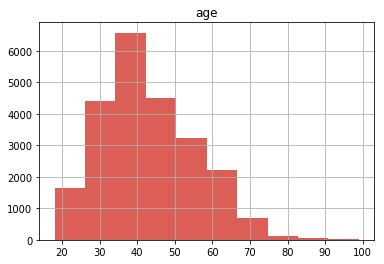

In [141]:
data[['age']].hist(bins=10)
plt.show()

Text(0,0.5,'RATING')

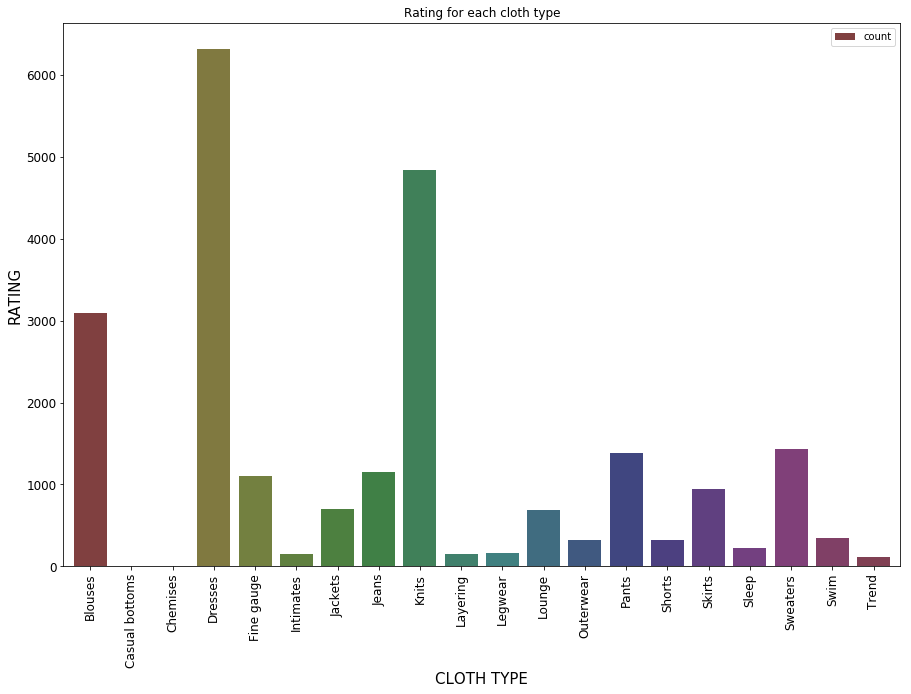

In [142]:
#Creating each bar of different colors -> option1
import colorsys
N = 20
HSV_tuples = [(x*1.0/N, 0.5, 0.5) for x in range(N)]
RGB_tuples = map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples)

#option2 

import seaborn as sns
palette = sns.color_palette(None, 20)

import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt

from itertools import cycle
cycol = cycle('bgrcmk')

r = pd.DataFrame({'count' : data.groupby( ["class_name"] ).size()}).reset_index()

ax = r.plot.bar(x = 'class_name',y = 'count' , width = 0.8 , color = RGB_tuples,
               title ="Rating for each cloth type", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("CLOTH TYPE", fontsize=15)
ax.set_ylabel("RATING", fontsize=15)

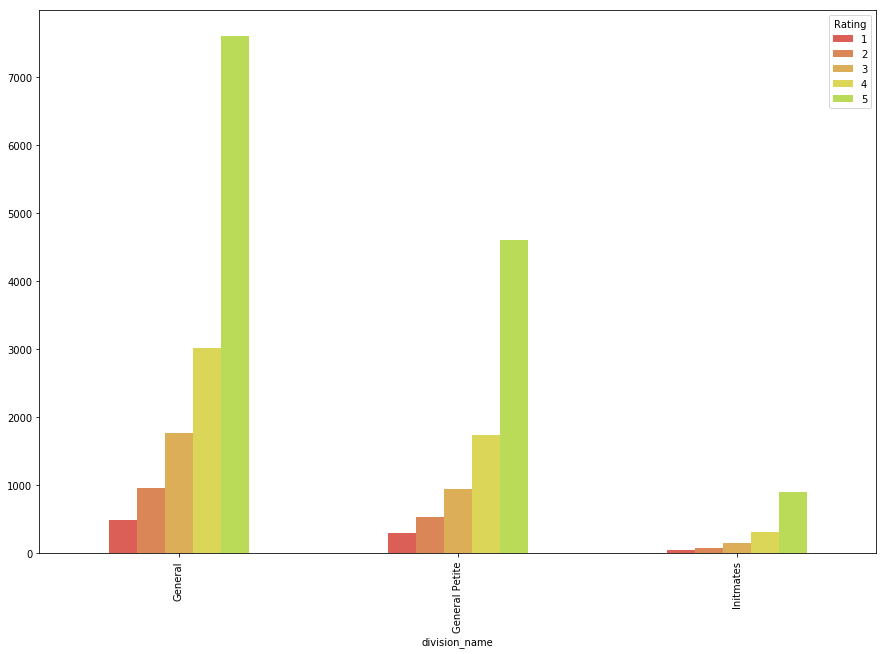

In [144]:
division_name_rating = data.groupby(['division_name','rating']).size().reset_index()
division_name_rating.columns = ['division_name','Rating','Occurence']

division_name_rating = division_name_rating.pivot(index='division_name',columns='Rating',values='Occurence').reset_index().plot(kind='bar',x='division_name' , figsize=(15, 10))
                                                                                                                             



In [145]:
#Age group -> how many indivisuals are there in each age group 

a = pd.cut(data['age'], [10, 20, 30, 40,50,60,70 , 80,90,100])

#convery groupbyobject into dataframe -> resetindex
r = pd.DataFrame({'c' : data.groupby( [a] ).size()}).reset_index()

r

,age,c
0,"(10, 20]",152
1,"(20, 30]",3186
2,"(30, 40]",7912
3,"(40, 50]",5908
4,"(50, 60]",3891
5,"(60, 70]",2057
6,"(70, 80]",281
7,"(80, 90]",86
8,"(90, 100]",13


Text(0,0.5,'Number of people')

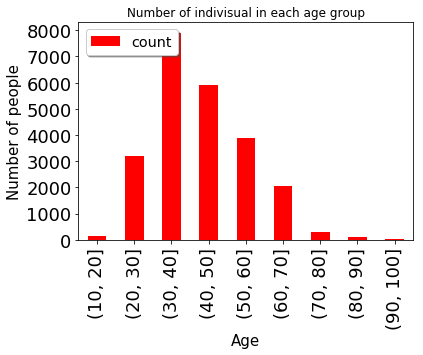

In [146]:
#Age group -> how many indivisuals are there in each age group 

a = pd.cut(data['age'], [10, 20, 30, 40,50,60,70 , 80,90,100])

#convery groupbyobject into dataframe -> resetindex
r = pd.DataFrame({'count' : data.groupby( [a] ).size()}).reset_index()

ax = r.plot(kind='bar' , x = 'age' ,y = 'count' ,width = 0.5,legend=True, fontsize=18 , color = 'red')

ax.legend(loc='upper left', shadow=True, fontsize='x-large')
ax.set_title("Number of indivisual in each age group")
ax.set_xlabel('Age',fontsize = 15)
ax.set_ylabel('Number of people',fontsize = 15)


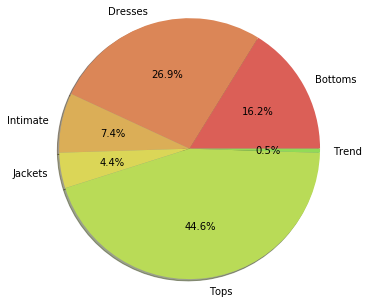

In [147]:
%matplotlib inline
import matplotlib.pyplot as plt

#dept['name'] = data.groupby('department_name').rating.count()

#convery groupbyobject into dataframe -> resetindex
r = pd.DataFrame({'c' : data.groupby( ["department_name"] ).size()}).reset_index()
plt.axis("equal")
plt.pie(r.c,labels=r.department_name,shadow=True, autopct='%1.1f%%',radius=1.5)
plt.show()
#dept.plot.pie('name')


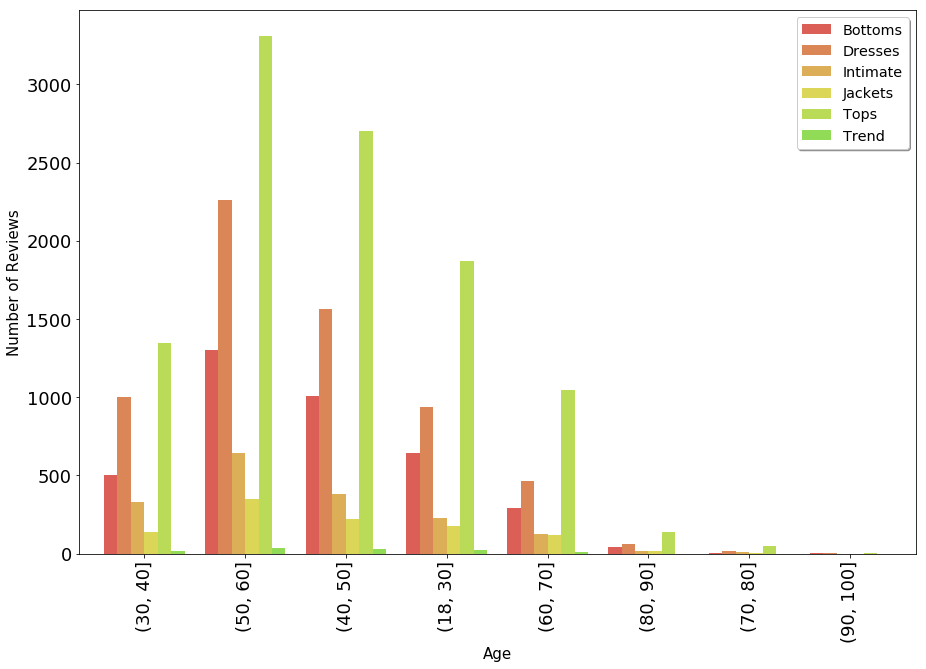

In [148]:
# https://stackoverflow.com/questions/47796264/function-to-create-grouped-bar-plot
#shift + tab for function details 
import matplotlib.pyplot as plt

a = pd.cut(data['age'], [18, 30, 40,50,60,70 , 80,90,100])
d = data.pivot_table('rating', index= [a], columns='department_name',aggfunc='count').plot(kind='bar' , width = 0.8,
                                                            figsize=(15, 10) , legend=True, fontsize=18)

plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.xlabel("Age", fontsize=15)
plt.ylabel("Number of Reviews", fontsize=15)



plt.show()


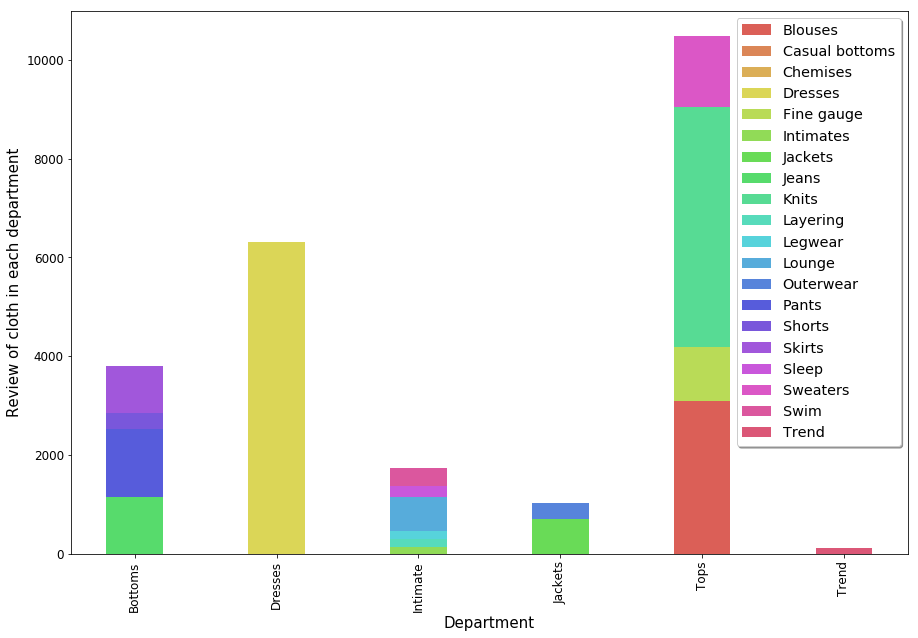

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
#Generate color plattet for each legend
c = sns.set_palette(sns.color_palette("hls", 20))

df = data.groupby(['department_name','class_name']).clothing_id .size()


df.unstack().plot(kind='bar',stacked=True,figsize=(15, 10), legend=True, fontsize=12,width = 0.4,color = c)
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.xlabel('Department',fontsize = 15)
plt.ylabel('Review of cloth in each department',fontsize = 15)
plt.show()


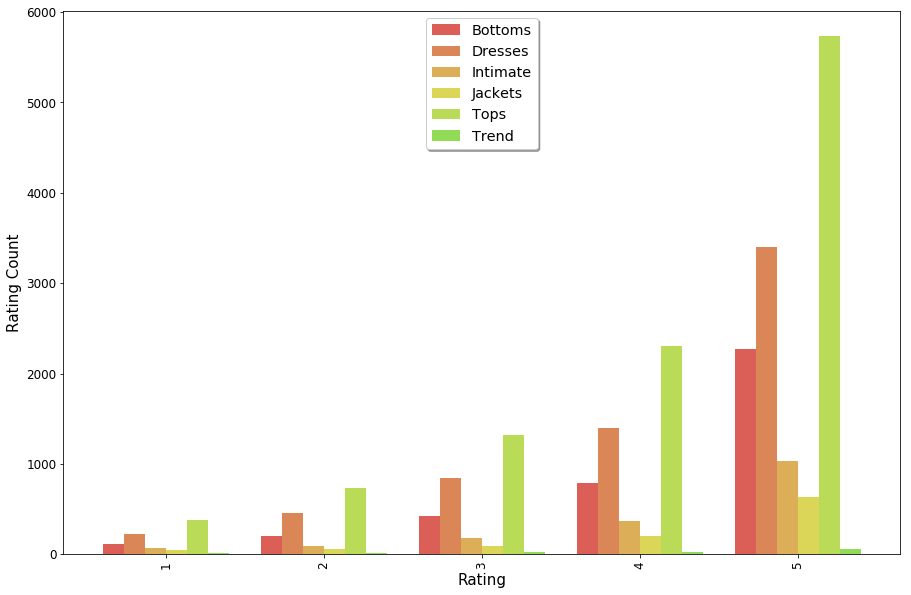

In [150]:
df = data.groupby(['rating','department_name']).rating.count()

df.unstack().plot(kind='bar',figsize=(15, 10), legend=True, fontsize=12,width = 0.8,color = c) #stacked=true
plt.legend(loc='upper center', shadow=True, fontsize='x-large')
plt.xlabel('Rating',fontsize = 15)
plt.ylabel('Rating Count',fontsize = 15)
plt.show()

In [151]:
#Which age group gives maximum rating

a = pd.cut(data['age'], [18,30,40,50,60,70,80,90,100])


df = data.pivot_table(index = [a,'rating'] , columns = 'department_name', values = 'clothing_id' ,aggfunc = 'count')
df
#df

department_name   Bottoms  Dresses  Intimate  Jackets    Tops  Trend
age       rating                                                    
(30, 40]  1          18.0     30.0      12.0      8.0    44.0    2.0
          2          32.0     64.0      14.0     12.0    91.0    1.0
          3          48.0    150.0      33.0     10.0   203.0    2.0
          4         104.0    222.0      70.0     24.0   281.0    3.0
          5         298.0    536.0     200.0     87.0   727.0    6.0
(50, 60]  1          44.0     91.0      24.0     13.0   108.0    NaN
          2          75.0    173.0      37.0     16.0   258.0    5.0
          3         167.0    299.0      70.0     32.0   442.0    4.0
          4         284.0    497.0     133.0     74.0   754.0   10.0
          5         734.0   1199.0     380.0    215.0  1748.0   20.0
(40, 50]  1          27.0     53.0      11.0     13.0   103.0    2.0
          2          48.0    117.0      22.0     16.0   214.0    3.0
          3         107.0    221.0      31.0     23.0   360.0    7.0
          4         204.0    362.0      94.0     49.0   616.0    4.0
          5         622.0    811.0     222.0    119.0  1409.0   13.0
(18, 30]  1          15.0     36.0      10.0     11.0    71.0    6.0
          2          35.0     64.0      12.0      6.0   115.0    1.0
          3          63.0    114.0      25.0     14.0   192.0    3.0
          4         126.0    196.0      47.0     35.0   406.0    7.0
          5         403.0    529.0     137.0    114.0  1090.0    7.0
(60, 70]  1          10.0     13.0       6.0      3.0    42.0    1.0
          2          11.0     35.0       5.0     10.0    45.0    NaN
          3          31.0     50.0      18.0      9.0   105.0    3.0
          4          57.0     96.0      23.0     15.0   215.0    2.0
          5         184.0    270.0      76.0     80.0   637.0    5.0
(80, 90]  1           1.0      3.0       NaN      1.0     6.0    NaN
          2           2.0      6.0       NaN      NaN    13.0    1.0
          3           4.0      4.0       1.0      3.0    18.0    NaN
          4          10.0     18.0       4.0      3.0    20.0    NaN
          5          26.0     34.0       9.0     10.0    84.0    NaN
(70, 80]  1           NaN      NaN       NaN      NaN     2.0    NaN
          2           1.0      2.0       NaN      NaN     2.0    NaN
          3           NaN      NaN       NaN      NaN     4.0    NaN
          4           NaN      2.0       NaN      1.0     4.0    NaN
          5           3.0     15.0       8.0      6.0    35.0    1.0
(90, 100] 1           NaN      2.0       NaN      NaN     NaN    NaN
          2           1.0      NaN       NaN      NaN     NaN    NaN
          3           1.0      NaN       NaN      NaN     NaN    NaN
          4           NaN      1.0       NaN      NaN     2.0    NaN
          5           2.0      2.0       1.0      NaN     1.0    NaN

Text(0,0.5,'Positive feedback count')

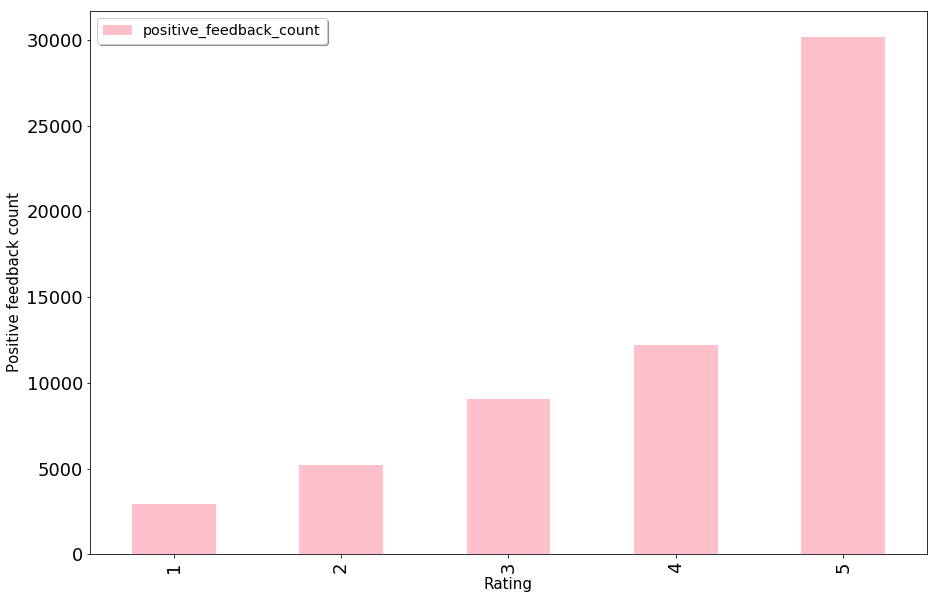

In [152]:
#positivie feedback count :Positive Integer documenting the number of other customers who found this review positive.

positiveFeedback = data.groupby(['rating']).positive_feedback_count.sum().reset_index()

ax = positiveFeedback.plot(kind='bar' , x = 'rating',y = 'positive_feedback_count' ,width = 0.5,
                            figsize=(15, 10) , legend=True, fontsize=18 , color = 'pink')

ax.legend(loc='upper left', shadow=True, fontsize='x-large')
ax.set_xlabel('Rating',fontsize = 15)
ax.set_ylabel('Positive feedback count',fontsize = 15)



Text(0.5,1,'Comparing overall good rating vs bad rating in each department')

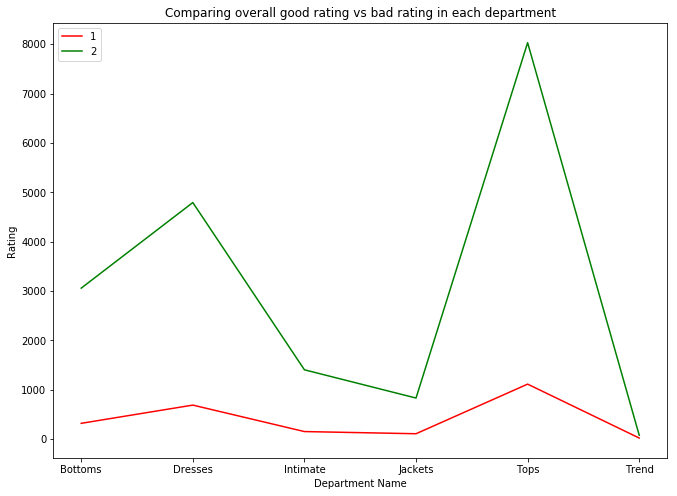

In [153]:
badRating = data[(data.rating < 3)]
b = badRating.groupby(['department_name']).rating.count().reset_index()
#print(b)

#Good rating 
goodRating = data[(data.rating > 3)]
g = goodRating.groupby(['department_name']).rating.count().reset_index()
g

fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)

ax1.plot(b.department_name, b.rating, label=1,color='r')
ax1.plot(g.department_name, g.rating, label=2,color = 'green')
ax1.legend(loc=2)
ax1.set_xlabel('Department Name')
ax1.set_ylabel('Rating')
#plt.ylabel('Population in million')
ax1.set_title('Comparing overall good rating vs bad rating in each department')


In [154]:
#Word count for each review 
data["wordCount_noTextanalysis"]= data["review_text"].str.split().str.len()

In [155]:
avgWordCount = data.groupby(['rating']).wordCount_noTextanalysis.agg(['mean','min','max','count']).reset_index()
avgWordCount

,rating,mean,min,max,count
0,1,58.633374,3.0,111.0,821
1,2,62.056811,6.0,110.0,1549
2,3,64.218208,3.0,115.0,2823
3,4,63.316015,2.0,113.0,4908
4,5,57.943062,2.0,115.0,12540


In [156]:
#Percentage Helpfulness of the review 

In [157]:
df = data.groupby(['rating','recommended_ind']).recommended_ind.count()
df

rating  recommended_ind
1       0                    826
        1                     16
2       0                   1471
        1                     94
3       0                   1682
        1                   1189
4       0                    168
        1                   4909
5       0                     25
        1                  13106
Name: recommended_ind, dtype: int64

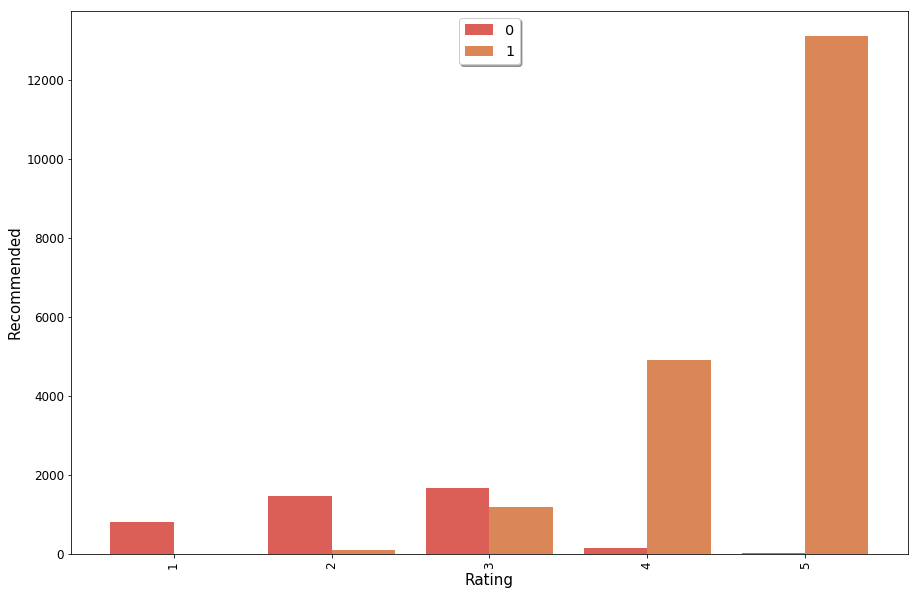

In [158]:
#Rating analysis as per the recommendation of the recview 
#Analysis on Recemoneded ind :Recommended IND: Binary variable stating where 
#the customer recommends the product where 1 is recommended, 0 is not recommended.
df = data.groupby(['rating','recommended_ind']).recommended_ind.count()

df.unstack().plot(kind='bar',figsize=(15, 10), legend=True, fontsize=12,width = 0.8,color = c) #stacked=true
plt.legend(loc='upper center', shadow=True, fontsize='x-large')
plt.xlabel('Rating',fontsize = 15)
plt.ylabel('Recommended',fontsize = 15)
plt.show()

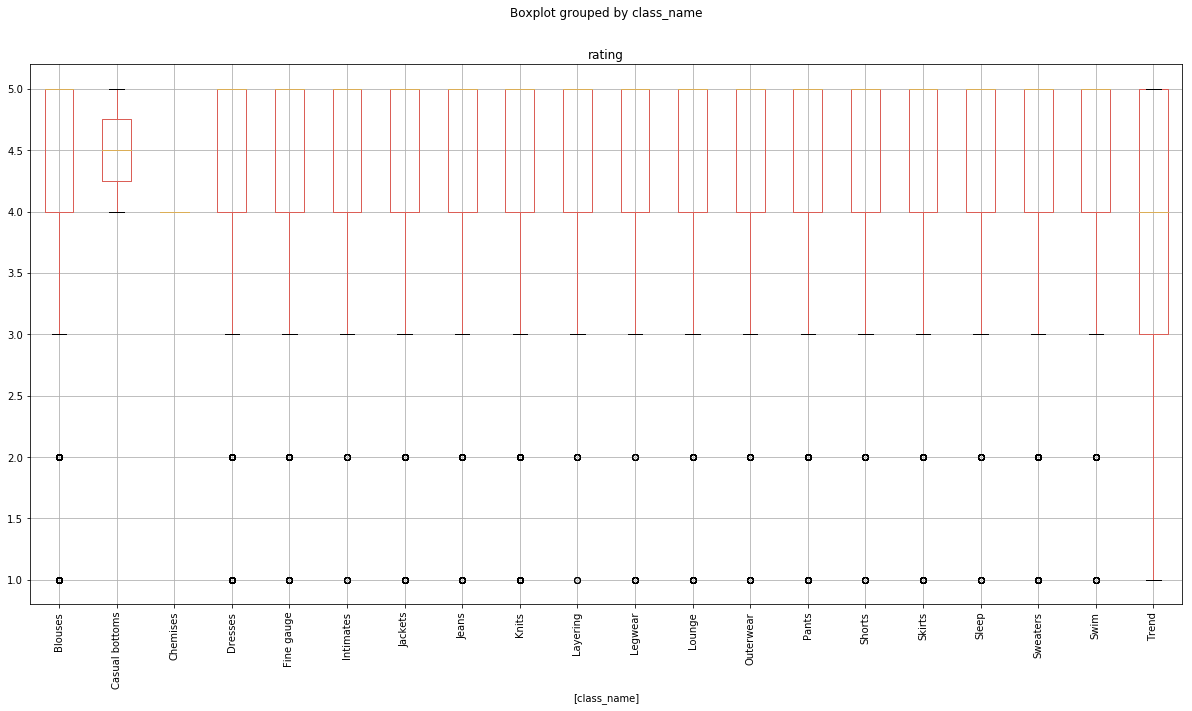

In [159]:
#Box Plot - Variation in rating with each class_name of cloth.

#bp = data.groupby(['rating']).boxplot()
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange','medians': 'DarkBlue', 'caps': 'Gray'}
division_name_rating= data[['rating','class_name']]
division_name_rating.boxplot(by='class_name',figsize=(20,10))
#division_name_rating.plot.box(by='class_name',figsize=(20,10) , color = color)
plt.xticks(rotation=90)
 
plt.show()


No handles with labels found to put in legend.


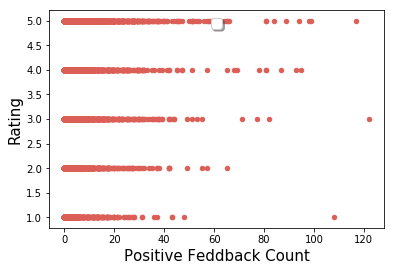

In [162]:
#Scatter plot 

df = data.groupby(['rating','recommended_ind']).recommended_ind.count()

data.plot(kind = 'scatter' , x = 'positive_feedback_count' , y = 'rating') #stacked=true
plt.legend(loc='upper center', shadow=True, fontsize='x-large')
plt.xlabel('Positive Feddback Count',fontsize = 15)
plt.ylabel('Rating',fontsize = 15)
plt.show()

#df.plot.scatter(x='a', y='b');

# Review Text Analysis

In [164]:
#Get indexes where review_text value is null
#Copying data to new dataframe
newData = data

indexVal=data[data.review_text.isnull()].index
 
# Delete these row indexes from dataFrame
newData.drop(indexVal , inplace=True)

In [165]:
import string 
import numpy as np 
#Apply first round of cleaning
def clean_text_round1(text):
    
    #convert text to lower case 
    text = text.lower()
    #replace all the punctuations  

    table = str.maketrans('', '', string.punctuation)
    text = text.translate(table)
    
    text = re.sub('([\[\{\(].*?[\]\}\)])','',text);
     #Remove numbers from the string
    text = re.sub('\d+', '', text)
    
    #Substitute multiple white space with single white space
    text = ' '.join(text.split())
    
    return text

round1 = lambda x: clean_text_round1(x)

In [166]:
#apply above function as series method
newData['cleanReviewText'] = newData.review_text.apply(clean_text_round1)


In [167]:
#Apply stemmer to cleaned data

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
porter = PorterStemmer()
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [porter.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

newData['review_after_stemming'] = newData['cleanReviewText'].apply(stem_sentences)


In [168]:
ENGLISH_STOP_WORDS = frozenset([
    "a", "about", "above", "across", "after", "afterwards", "again", "against",
    "all", "almost", "alone", "along", "already", "also", "although", "always",
    "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
    "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are",
    "around", "as", "at", "back", "be", "became", "because", "become",
    "becomes", "becoming", "been", "before", "beforehand", "behind", "being", "bought" ,
    "below", "beside", "besides", "between", "beyond", "bill", "both",
    "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con",
    "could", "couldnt", "cry", "de", "describe", "detail", "do", "did" , "does", "done",
    "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else",
    "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
    "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill",
    "find", "fire", "first", "five", "for", "former", "formerly", "forty",
    "found", "four", "from", "front", "full", "further", "get", "give", "go",
    "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter",
    "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his",
    "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed",
    "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter",
    "latterly", "least", "less", "ltd", "made", "many", "may", "me",
    "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly",
    "move", "much", "must", "my", "myself", "name", "namely", "neither",
    "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone",
    "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on",
    "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our",
    "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps",
    "please", "put", "rather", "re", "same", "see", "seem", "seemed",
    "seeming", "seems", "serious", "several", "she", "should", "show", "side",
    "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone",
    "something", "sometime", "sometimes", "somewhere", "still", "such",
    "system", "take", "ten", "than", "that", "the", "their", "them",
    "themselves", "then", "thence", "there", "thereafter", "thereby",
    "therefore", "therein", "thereupon", "these", "they", "thick", "thin",
    "third", "this", "those", "though", "three", "through", "throughout",
    "thru", "thus", "to", "together", "too", "top", "toward", "towards",
    "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us",
    "very", "via", "was", "we", "well", "were", "what", "whatever", "when",
    "whence", "whenever", "where", "whereafter", "whereas", "whereby",
    "wherein", "whereupon", "wherever", "whether", "which", "while", "whither",
    "who", "whoever", "whole", "whom", "whose", "why", "will", "with",
    "within", "without", "would", "yet", "you", "your", "yours", "yourself",
    "yourselves" , "just" , "sooo" , "so" , "truly","ok",'went','wil','will','wanted','xs','xxs','waas'])


In [169]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')
stopwords.extend(ENGLISH_STOP_WORDS)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aparajitasahay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [170]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.

newData['review_without_stopwords'] = newData['cleanReviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))



In [172]:
newData["wordCountWithStopWordsReview"]= newData["cleanReviewText"].str.split().str.len()

In [173]:
newData["wordCountWithoutStopWordsReview"]= newData["review_without_stopwords"].str.split().str.len

In [174]:
newData.groupby('rating').wordCountWithStopWordsReview.median()

rating
1    57
2    61
3    63
4    63
5    55
Name: wordCountWithStopWordsReview, dtype: int64

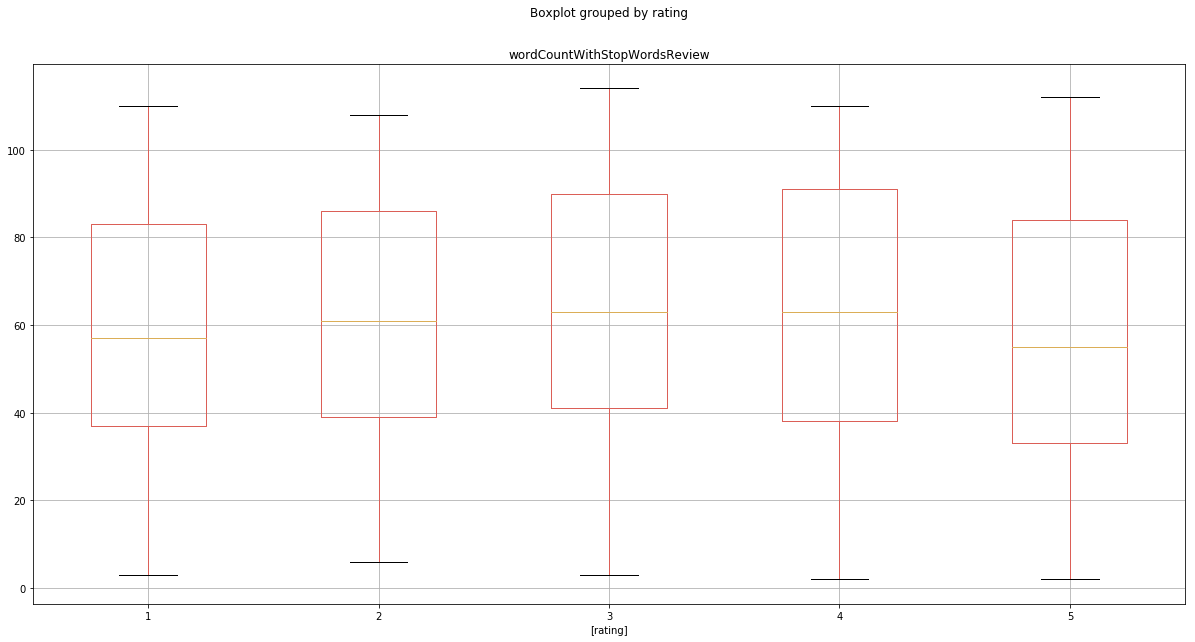

In [184]:
division_name_rating= newData[['rating','wordCountWithStopWordsReview']]
division_name_rating.boxplot(by='rating',figsize=(20,10))

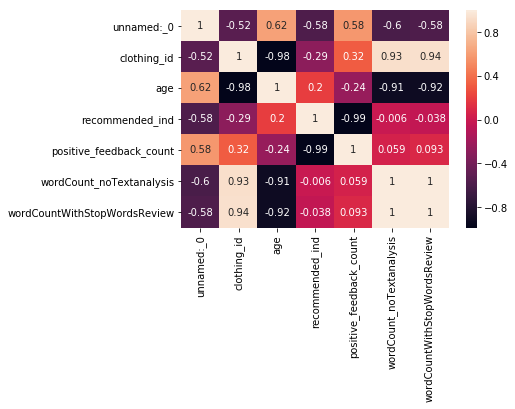

In [179]:
import seaborn as sns
da = data.groupby('rating').mean()
da.corr()
sns.heatmap(data=da.corr(), annot=True)

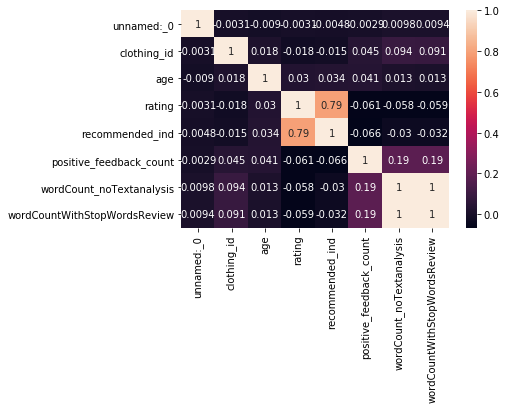

In [182]:
import seaborn as sns

sns.heatmap(data=data.corr(method = 'pearson'), annot=True )


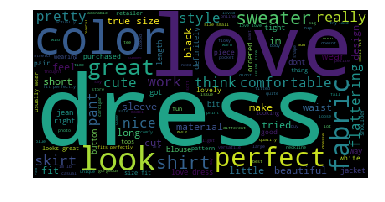

In [175]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
dataFrame = newData[(newData.rating >3)]

wordcloud2 = WordCloud().generate(' '.join(dataFrame['review_without_stopwords']))

plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

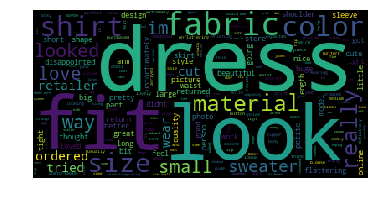

In [176]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
dataFrame = newData[(newData.rating < 3)]


wordcloud2 = WordCloud().generate(' '.join(dataFrame['review_without_stopwords']))
#wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [186]:
newData_class = newData[(newData['rating'] == 1) | (newData['rating'] == 5)]
newData_class.shape


(13361, 17)

In [187]:
newData.shape

(22641, 17)